# **📌 Extração (E - Extract)**

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)
print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

# **🔧 Transformação (T - Transform)**

In [ ]:
# Normalizando colunas
df_normalizado = pd.json_normalize(data)

df_normalizado.head(20)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.9


In [ ]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [ ]:
df_normalizado.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

##Verificando Inconsistências nos Dados

In [ ]:
# Verifique se há valores únicos em cada coluna
for col in df_normalizado.columns:
  print(f"valores únicos na coluna'{col}': {df_normalizado[col].nunique()}")
  if df_normalizado[col].nunique() < 50: # Imprima os valores somente se não houver muitos
    print(df_normalizado[col].unique())
    print('-' * 50)  # Linha divisória para melhor visualização

valores únicos na coluna'customerID': 7267
valores únicos na coluna'Churn': 3
['No' 'Yes' '']
--------------------------------------------------
valores únicos na coluna'customer.gender': 2
['Female' 'Male']
--------------------------------------------------
valores únicos na coluna'customer.SeniorCitizen': 2
[0 1]
--------------------------------------------------
valores únicos na coluna'customer.Partner': 2
['Yes' 'No']
--------------------------------------------------
valores únicos na coluna'customer.Dependents': 2
['Yes' 'No']
--------------------------------------------------
valores únicos na coluna'customer.tenure': 73
valores únicos na coluna'phone.PhoneService': 2
['Yes' 'No']
--------------------------------------------------
valores únicos na coluna'phone.MultipleLines': 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
valores únicos na coluna'internet.InternetService': 3
['DSL' 'Fiber optic' 'No']
--------------------------------------

In [ ]:
# Procurando valores nulos
df_normalizado.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [ ]:
# Procurar valores duplicados
print(f'O número de valores duplicados: {df_normalizado.duplicated().sum()}')

O número de valores duplicados: 0


In [ ]:
#Procurando linhas com string vazias
df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [ ]:
#Mostrar tipos de colunas
df_normalizado.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


In [ ]:
#Alterando coluna 'account.Charges.Total' para float
df_normalizado['account.Charges.Total'] = pd.to_numeric(df_normalizado['account.Charges.Total'], errors='coerce')
print(df_normalizado['account.Charges.Total'].dtype)

float64


In [ ]:
#Apagando linhas com string vazias

df_normalizado = df_normalizado[df_normalizado['Churn'].str.strip() != '']
print("Número de linhas após apagar linhas vazias no 'Churn':", len(df_normalizado))

Número de linhas após apagar linhas vazias no 'Churn': 7043


In [ ]:
#Verificando linhas vazias novamente
df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [ ]:
# Calculando os gastos diários
df_normalizado['Total.Daily'] = ((df_normalizado['account.Charges.Total'] / df_normalizado['customer.tenure']) /30 ).round(2)

df_normalizado.head()

/tmp/ipython-input-231-294835138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalizado['Total.Daily'] = ((df_normalizado['account.Charges.Total'] / df_normalizado['customer.tenure']) /30 ).round(2)


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Total.Daily
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.20
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.01
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.34
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.17
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.97


In [ ]:
# Yes e No para 1 e 0
for col in df_normalizado.columns:
    df_normalizado[col] = df_normalizado[col].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else x))


df_normalizado.head()

/tmp/ipython-input-232-2568372704.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalizado[col] = df_normalizado[col].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else x))


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Total.Daily
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.20
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.01
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.34
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.17
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.97


In [ ]:
# Verificando novamente os valores das colunas
for col in df_normalizado.columns:
  print(f"valores únicos na coluna'{col}': {df_normalizado[col].nunique()}")
  if df_normalizado[col].nunique() < 50:
    print(df_normalizado[col].unique())
    print('-' * 50)

valores únicos na coluna'customerID': 7043
valores únicos na coluna'Churn': 2
[0 1]
--------------------------------------------------
valores únicos na coluna'customer.gender': 2
['Female' 'Male']
--------------------------------------------------
valores únicos na coluna'customer.SeniorCitizen': 2
[0 1]
--------------------------------------------------
valores únicos na coluna'customer.Partner': 2
[1 0]
--------------------------------------------------
valores únicos na coluna'customer.Dependents': 2
[1 0]
--------------------------------------------------
valores únicos na coluna'customer.tenure': 73
valores únicos na coluna'phone.PhoneService': 2
[1 0]
--------------------------------------------------
valores únicos na coluna'phone.MultipleLines': 3
[0 1 'No phone service']
--------------------------------------------------
valores únicos na coluna'internet.InternetService': 3
['DSL' 'Fiber optic' 0]
--------------------------------------------------
valores únicos na coluna'int

In [ ]:
# traduzindo colunas

df_final = df_normalizado.rename(columns={
    'customerID': 'ID do Cliente',
    'Churn': 'Cancelamento',
    'customer.gender': 'Gênero do Cliente',
    'customer.SeniorCitizen': 'Cliente Idoso',
    'customer.Partner': 'Possui Cônjuge',
    'customer.Dependents': 'Possui Dependentes',
    'customer.tenure': 'Tempo de Contrato (meses)',
    'phone.PhoneService': 'Serviço de Telefonia',
    'phone.MultipleLines': 'Possui Múltiplas Linhas Telefônicas',
    'internet.InternetService': 'Serviço de Internet',
    'internet.OnlineSecurity': 'Segurança Online',
    'internet.OnlineBackup': 'Backup Online',
    'internet.DeviceProtection': 'Proteção de Dispositivo',
    'internet.TechSupport': 'Suporte Técnico',
    'internet.StreamingTV': 'Streaming de TV',
    'internet.StreamingMovies': 'Streaming de Filmes',
    'account.Contract': 'Tipo de Contrato',
    'account.PaperlessBilling': 'Fatura Digital',
    'account.PaymentMethod': 'Método de Pagamento',
    'account.Charges.Monthly': 'Cobrança Mensal',
    'account.Charges.Total': 'Cobrança Total',
    'Total.Daily': 'Gasto Diário'
})

# Traduzindo valores das colunas

df_final['Gênero do Cliente'] = df_final['Gênero do Cliente'].apply(lambda x: 'Masculino' if x == 'Male' else 'Feminino')
df_final['Possui Múltiplas Linhas Telefônicas'] = df_final['Possui Múltiplas Linhas Telefônicas'].replace('No phone service', 'Sem serviço de telefonia')
df_final['Serviço de Internet'] = df_final['Serviço de Internet'].replace('Fiber optic', 'Fibra ótica')

for col in df_final.columns:
  df_final[col] = df_final[col].replace('No internet service', 'Sem serviço de internet')

df_final['Tipo de Contrato'] = df_final['Tipo de Contrato'].apply(lambda x: 'Mensal' if x == 'Month-to-month' else ('Bienal' if x == 'Two year' else 'Anual'))

df_final['Método de Pagamento'] = df_final['Método de Pagamento'].replace({
    'Mailed check': 'Boleto por correspondência',
    'Electronic check': 'Boleto eletrônico',
    'Credit card (automatic)': 'Cartão de crédito (automático)',
    'Bank transfer (automatic)': 'Transferência bancária (automática)'
})

df_final.head(20)

,ID do Cliente,Cancelamento,Gênero do Cliente,Cliente Idoso,Possui Cônjuge,Possui Dependentes,Tempo de Contrato (meses),Serviço de Telefonia,Possui Múltiplas Linhas Telefônicas,Serviço de Internet,...,Proteção de Dispositivo,Suporte Técnico,Streaming de TV,Streaming de Filmes,Tipo de Contrato,Fatura Digital,Método de Pagamento,Cobrança Mensal,Cobrança Total,Gasto Diário
0,0002-ORFBO,0,Feminino,0,1,1,9,1,0,DSL,...,0,1,1,0,Anual,1,Boleto por correspondência,65.60,593.30,2.20
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,...,0,0,0,1,Mensal,0,Boleto por correspondência,59.90,542.40,2.01
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fibra ótica,...,1,0,0,0,Mensal,1,Boleto eletrônico,73.90,280.85,2.34
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fibra ótica,...,1,0,1,1,Mensal,1,Boleto eletrônico,98.00,1237.85,3.17
4,0013-EXCHZ,1,Feminino,1,1,0,3,1,0,Fibra ótica,...,0,1,1,0,Mensal,1,Boleto por correspondência,83.90,267.40,2.97
5,0013-MHZWF,0,Feminino,0,0,1,9,1,0,DSL,...,0,1,1,1,Mensal,1,Cartão de crédito (automático),69.40,571.45,2.12
6,0013-SMEOE,0,Feminino,1,1,0,71,1,0,Fibra ótica,...,1,1,1,1,Bienal,1,Transferência bancária (automática),109.70,7904.25,3.71
7,0014-BMAQU,0,Masculino,0,1,0,63,1,1,Fibra ótica,...,0,1,0,0,Bienal,1,Cartão de crédito (automático),84.65,5377.80,2.85
8,0015-UOCOJ,0,Feminino,1,0,0,7,1,0,DSL,...,0,0,0,0,Mensal,1,Boleto eletrônico,48.20,340.35,1.62
9,0016-QLJIS,0,Feminino,0,1,1,65,1,1,DSL,...,1,1,1,1,Bienal,1,Boleto por correspondência,90.45,5957.90,3.06


#**📊 Carga e Análise (L - Load & Analysis)**

In [ ]:
map_traducao = {
    'count': 'contagem',
    'mean': 'média',
    'std': 'desvio_padrao',
    'min': 'minimo',
    '25%': '25_percentil',
    '50%': '50_percentil (mediana)',
    '75%': '75_percentil',
    'max': 'maximo'
}

df_final.describe().T.rename(columns=map_traducao)

,contagem,média,desvio_padrao,minimo,25_percentil,50_percentil (mediana),75_percentil,maximo
Cancelamento,7043.0,0.265370,0.441561,0.00,0.0000,0.000,1.0000,1.00
Cliente Idoso,7043.0,0.162147,0.368612,0.00,0.0000,0.000,0.0000,1.00
Possui Cônjuge,7043.0,0.483033,0.499748,0.00,0.0000,0.000,1.0000,1.00
Possui Dependentes,7043.0,0.299588,0.458110,0.00,0.0000,0.000,1.0000,1.00
Tempo de Contrato (meses),7043.0,32.371149,24.559481,0.00,9.0000,29.000,55.0000,72.00
Serviço de Telefonia,7043.0,0.903166,0.295752,0.00,1.0000,1.000,1.0000,1.00
Fatura Digital,7043.0,0.592219,0.491457,0.00,0.0000,1.000,1.0000,1.00
Cobrança Mensal,7043.0,64.761692,30.090047,18.25,35.5000,70.350,89.8500,118.75
Cobrança Total,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80
Gasto Diário,7032.0,2.159879,1.006217,0.46,1.2075,2.350,3.0100,4.05


## Taxa de evasão

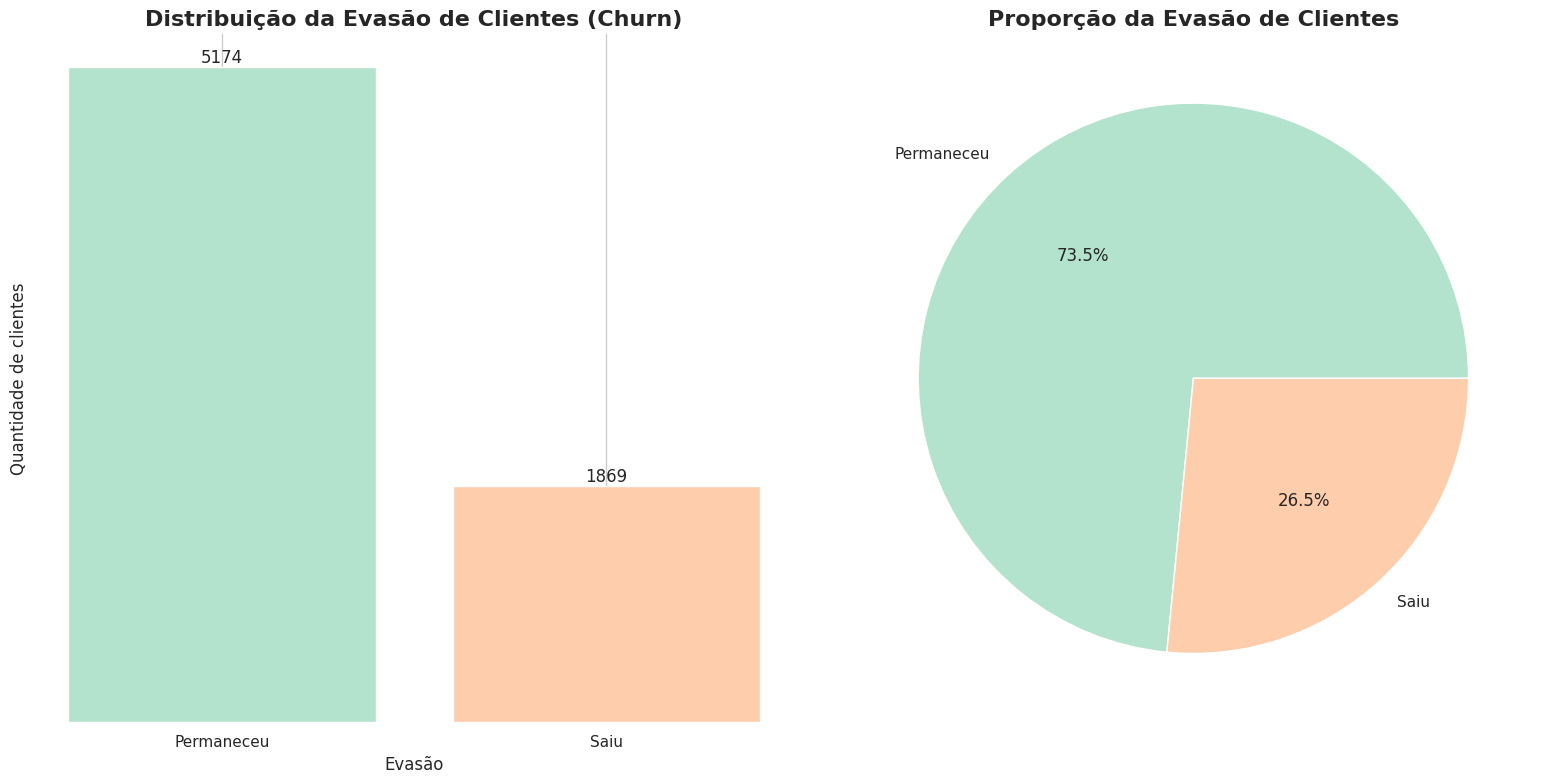

In [ ]:
# Plotando gráficos do Churn

contagem_evasao = df_final['Cancelamento'].value_counts()
labels = ['Permaneceu', 'Saiu']
cores = plt.cm.Pastel2(range(len(contagem_evasao)))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico de barras
barras = ax1.bar(labels, contagem_evasao.values, color=cores)
ax1.set_title('Distribuição da Evasão de Clientes (Churn)',  fontsize=16, fontweight='bold')
ax1.set_xlabel('Evasão', fontsize=12)
ax1.set_ylabel('Quantidade de clientes', fontsize=12)
ax1.set_yticks([])

plt.setp(ax1.spines.values(), visible=False)

for container in ax1.containers:
      ax1.bar_label(container, fmt='%d')

# Gráfico de setores
ax2.pie(contagem_evasao.values, labels=labels, autopct='%1.1f%%', colors=cores)
ax2.set_title('Proporção da Evasão de Clientes', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

## Variávis categóricas

## Evasão por Gênero

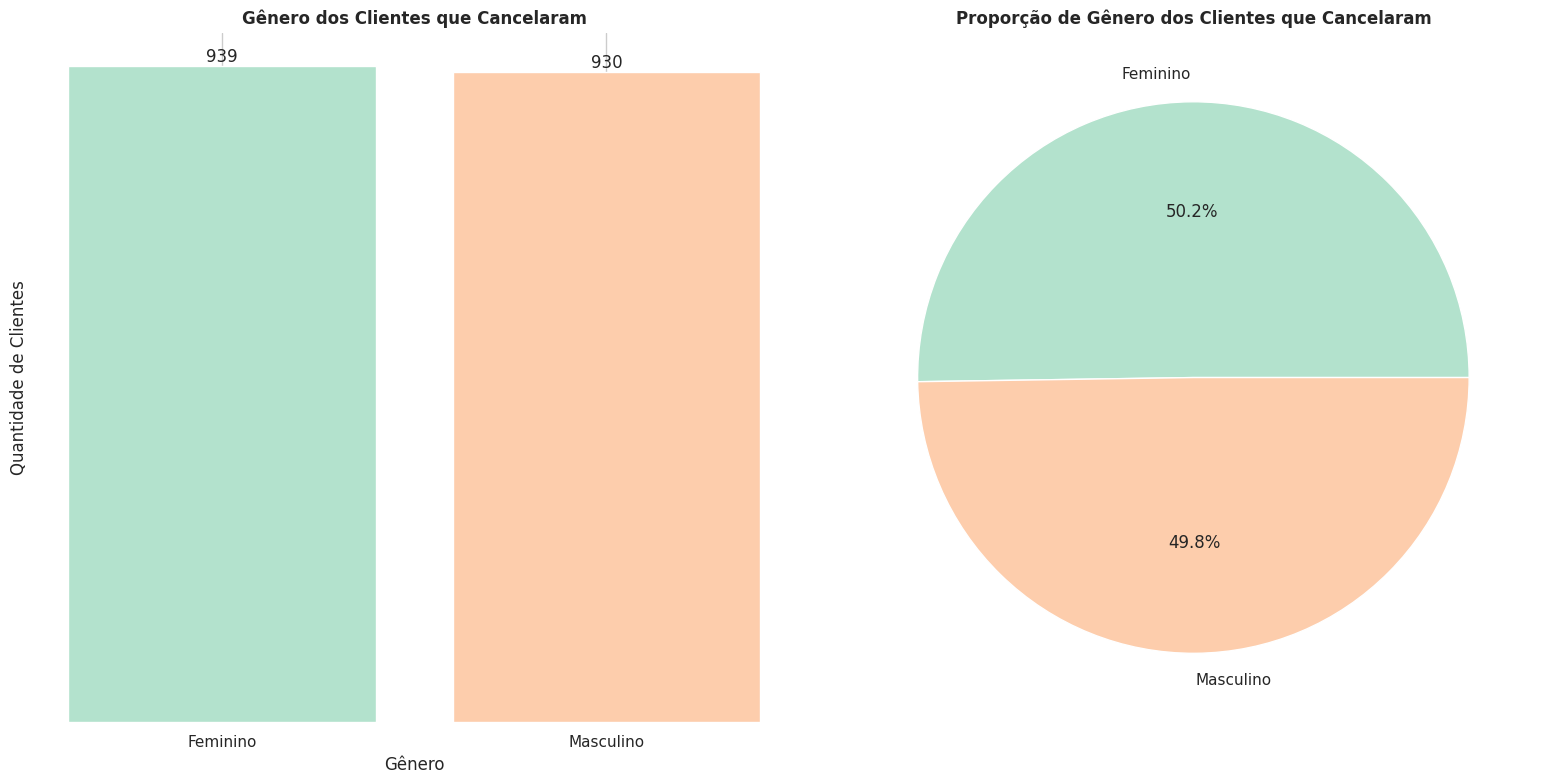

In [ ]:
df_churn = df_final[df_final['Cancelamento'] == 1]

gender_churn_counts = df_churn['Gênero do Cliente'].value_counts()

cores = plt.cm.Pastel2(range(len(gender_churn_counts)))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.bar(gender_churn_counts.index, gender_churn_counts.values, color=cores)
ax1.set_title('Gênero dos Clientes que Cancelaram', fontweight='bold')
ax1.set_xlabel('Gênero')
ax1.set_ylabel('Quantidade de Clientes')
ax1.set_yticks([])

plt.setp(ax1.spines.values(), visible=False)

for container in ax1.containers:
      ax1.bar_label(container, fmt='%d')

ax2.pie(gender_churn_counts.values, labels=gender_churn_counts.index, autopct='%1.1f%%', colors=cores)
ax2.set_title('Proporção de Gênero dos Clientes que Cancelaram', fontweight='bold')

plt.tight_layout()
plt.show()

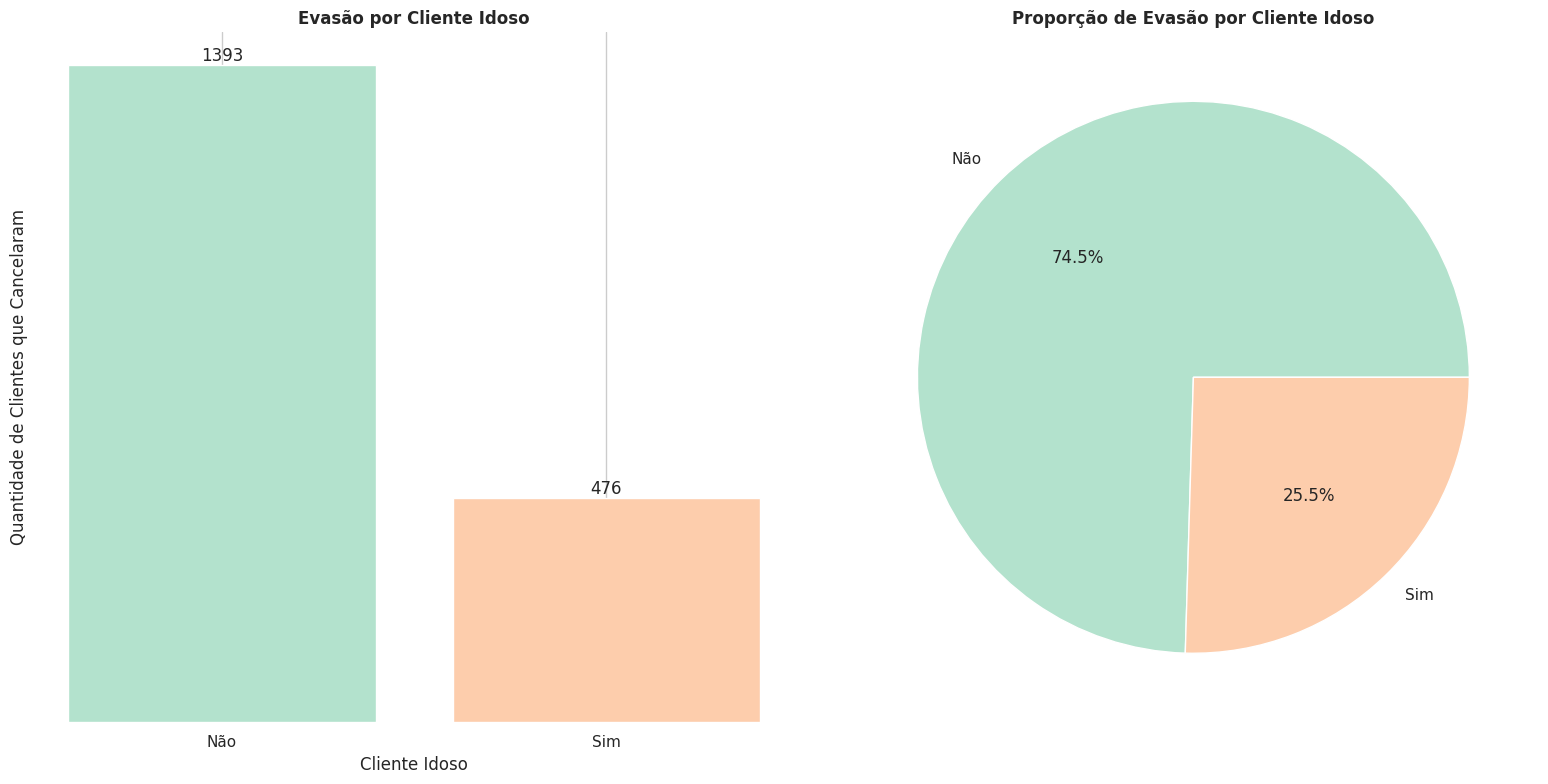

In [ ]:
df_senior_citizen = df_churn['Cliente Idoso'].replace({0: 'Não', 1: 'Sim'})

senior_citizen_churn_counts = df_senior_citizen.value_counts()

cores = plt.cm.Pastel2(range(len(senior_citizen_churn_counts)))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

ax1.bar(senior_citizen_churn_counts.index, senior_citizen_churn_counts.values, color=cores)
ax1.set_title('Evasão por Cliente Idoso', fontweight='bold')
ax1.set_xlabel('Cliente Idoso')
ax1.set_ylabel('Quantidade de Clientes que Cancelaram')
ax1.set_yticks([])

plt.setp(ax1.spines.values(), visible=False)

for container in ax1.containers:
      ax1.bar_label(container, fmt='%d')

ax2.pie(senior_citizen_churn_counts.values, labels=senior_citizen_churn_counts.index, autopct='%1.1f%%', colors=cores)
ax2.set_title('Proporção de Evasão por Cliente Idoso', fontweight='bold')

plt.tight_layout()
plt.show()

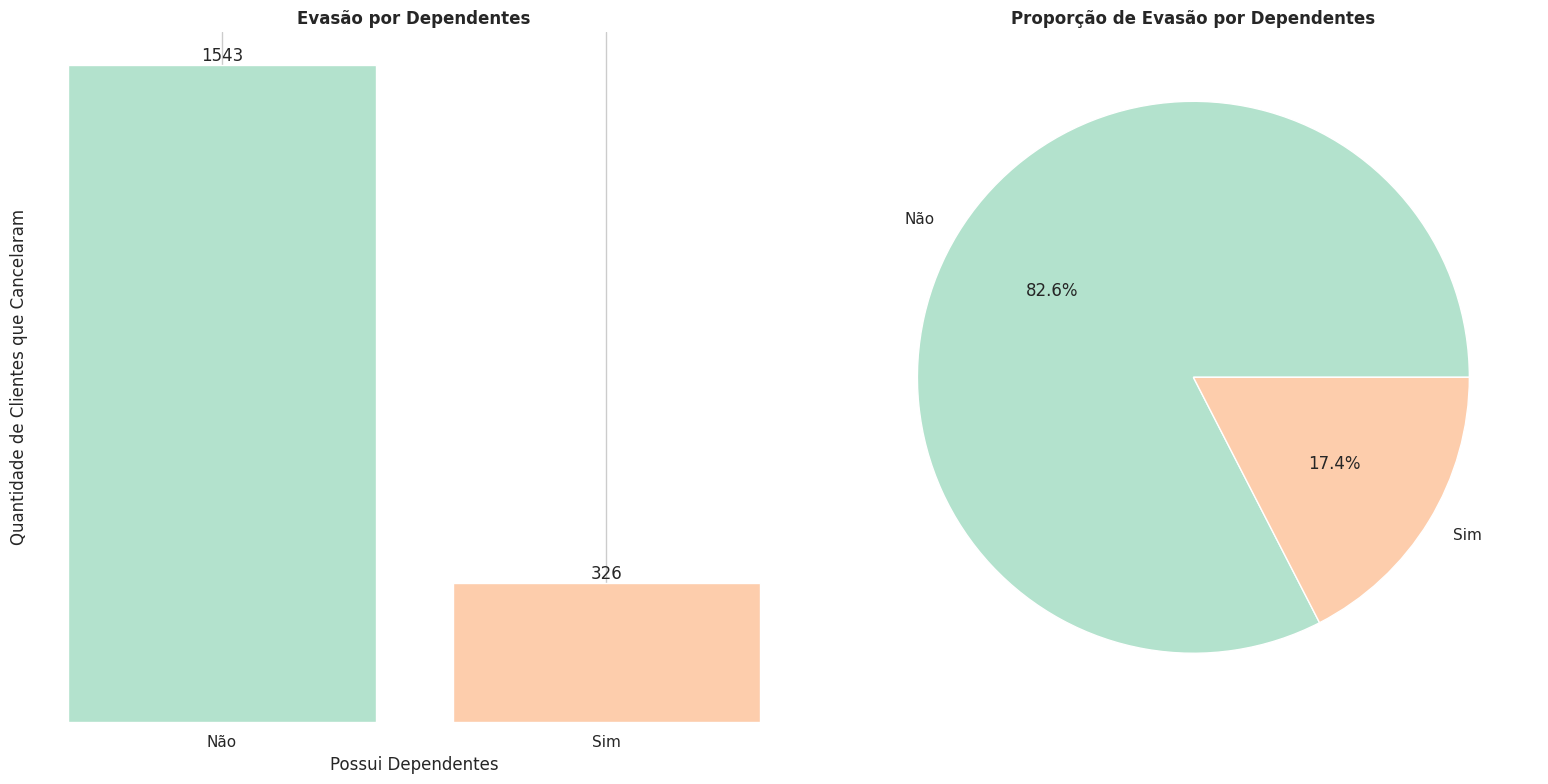

In [ ]:
df_dependents = df_churn['Possui Dependentes'].replace({0: 'Não', 1: 'Sim'})

dependents_churn_counts = df_dependents.value_counts()

cores = plt.cm.Pastel2(range(len(dependents_churn_counts)))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

ax1.bar(dependents_churn_counts.index, dependents_churn_counts.values, color=cores)
ax1.set_title('Evasão por Dependentes', fontweight='bold')
ax1.set_xlabel('Possui Dependentes')
ax1.set_ylabel('Quantidade de Clientes que Cancelaram')
ax1.set_yticks([])

plt.setp(ax1.spines.values(), visible=False)

for container in ax1.containers:
      ax1.bar_label(container, fmt='%d')

ax2.pie(dependents_churn_counts.values, labels=dependents_churn_counts.index, autopct='%1.1f%%', colors=cores)
ax2.set_title('Proporção de Evasão por Dependentes', fontweight='bold')

plt.tight_layout()
plt.show()

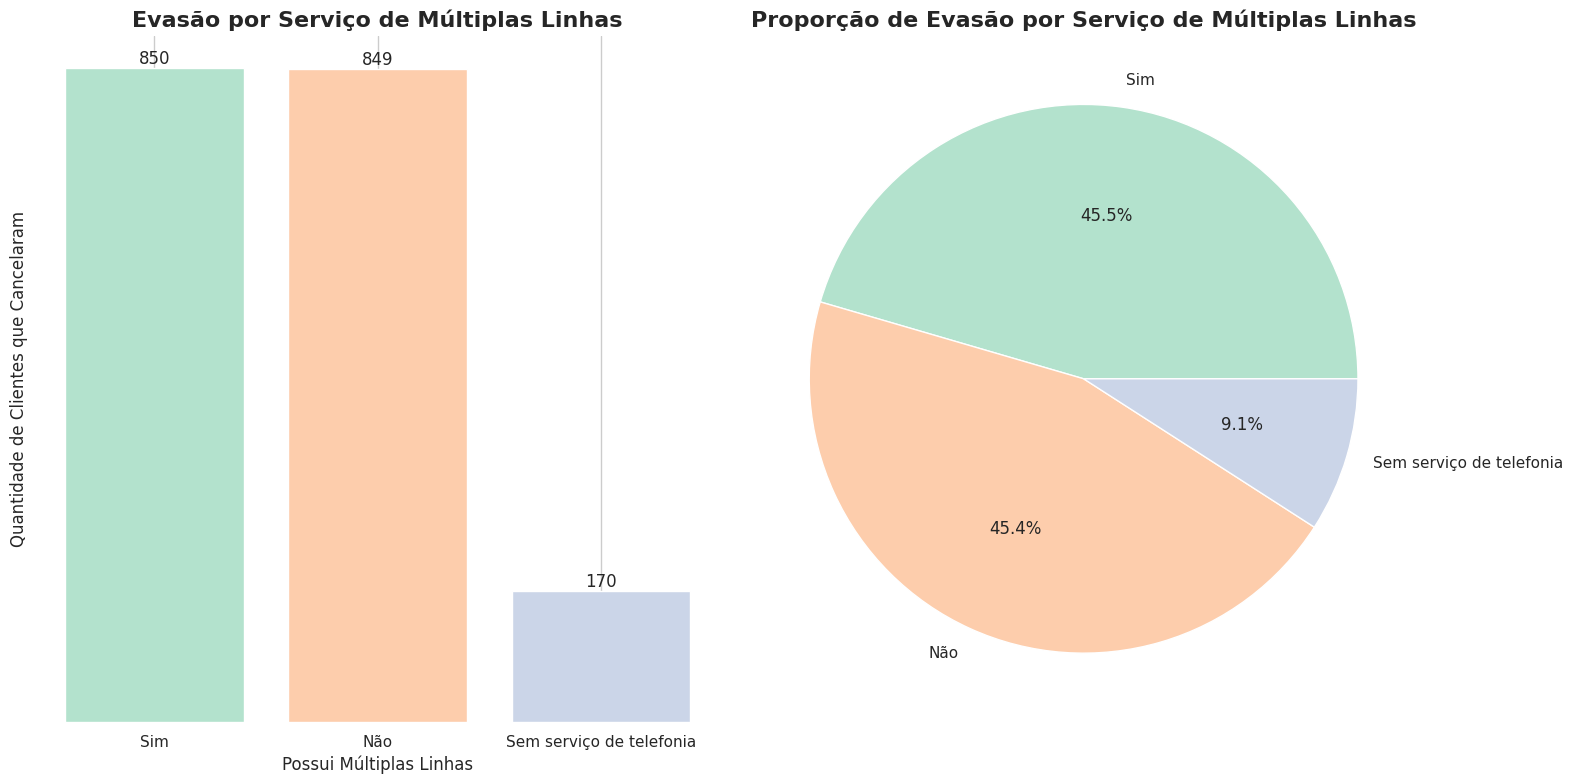

In [ ]:
df_multipla = df_churn['Possui Múltiplas Linhas Telefônicas'].replace({0: 'Não', 1: 'Sim'})

multipla_churn_counts = df_multipla.value_counts()

cores = plt.cm.Pastel2(range(len(multipla_churn_counts)))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

barras = ax1.bar(multipla_churn_counts.index, multipla_churn_counts.values, color=cores)

ax1.set_title('Evasão por Serviço de Múltiplas Linhas', fontsize=16, fontweight='bold')
ax1.set_xlabel('Possui Múltiplas Linhas', fontsize=12)
ax1.set_ylabel('Quantidade de Clientes que Cancelaram', fontsize=12)
ax1.set_yticks([])
ax1.bar_label(barras, fmt='%d')

plt.setp(ax1.spines.values(), visible=False)


ax2.pie(multipla_churn_counts.values, labels=multipla_churn_counts.index, autopct='%1.1f%%', colors=cores,
    wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=False)
ax2.set_title('Proporção de Evasão por Serviço de Múltiplas Linhas', fontsize=16, fontweight='bold')



plt.tight_layout()
plt.show()

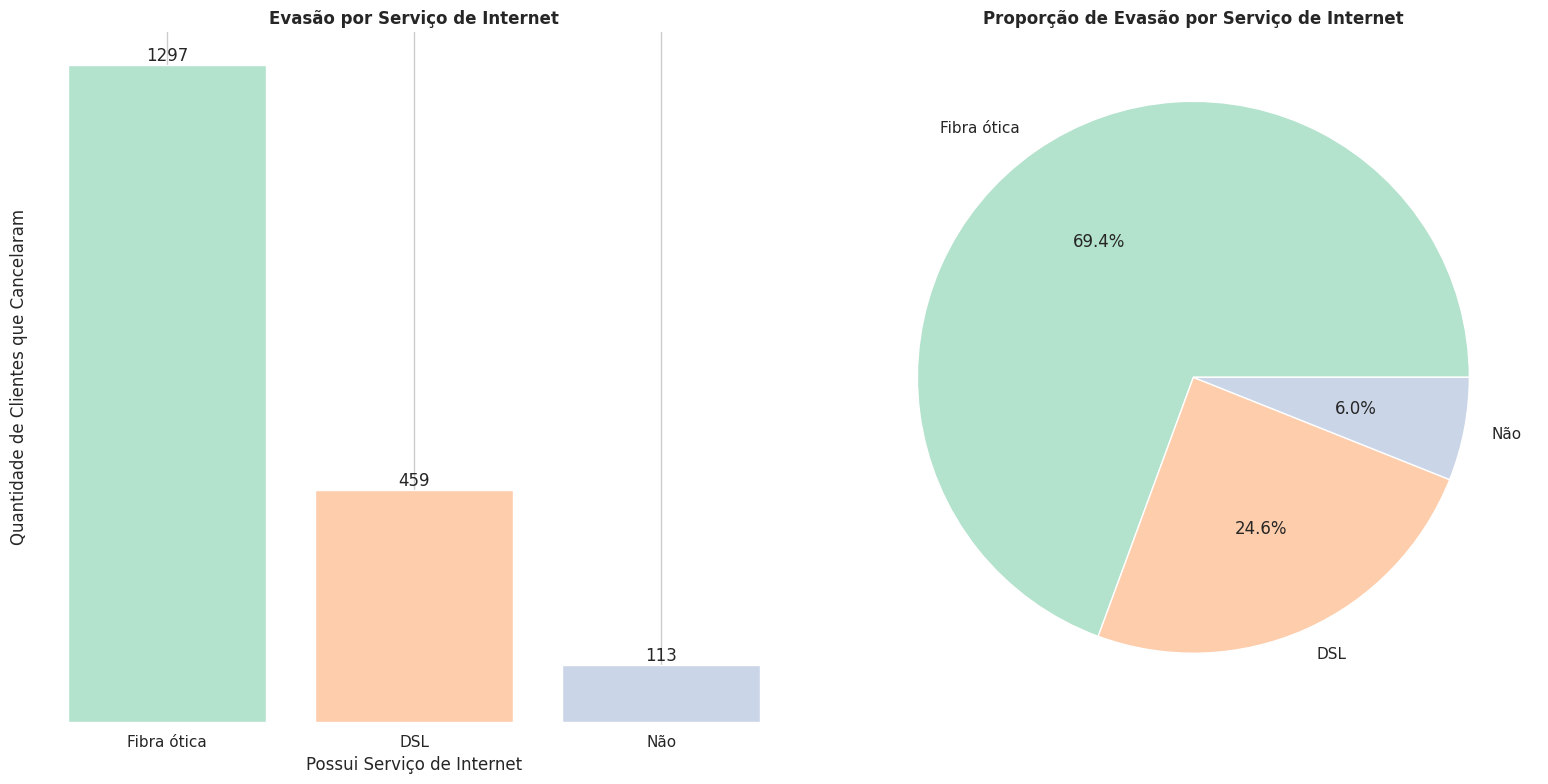

In [ ]:
df_internetservice = df_churn['Serviço de Internet'].replace({0: 'Não', 1: 'Sim'})

internet_churn_counts = df_internetservice.value_counts()

cores = plt.cm.Pastel2(range(len(internet_churn_counts)))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

ax1.bar(internet_churn_counts.index, internet_churn_counts.values, color=cores)
ax1.set_title('Evasão por Serviço de Internet', fontweight='bold')
ax1.set_xlabel('Possui Serviço de Internet')
ax1.set_ylabel('Quantidade de Clientes que Cancelaram')
ax1.set_yticks([])

plt.setp(ax1.spines.values(), visible=False)

for container in ax1.containers:
      ax1.bar_label(container, fmt='%d')

ax2.pie(internet_churn_counts.values, labels=internet_churn_counts.index, autopct='%1.1f%%', colors=cores)
ax2.set_title('Proporção de Evasão por Serviço de Internet', fontweight='bold')

plt.tight_layout()
plt.show()

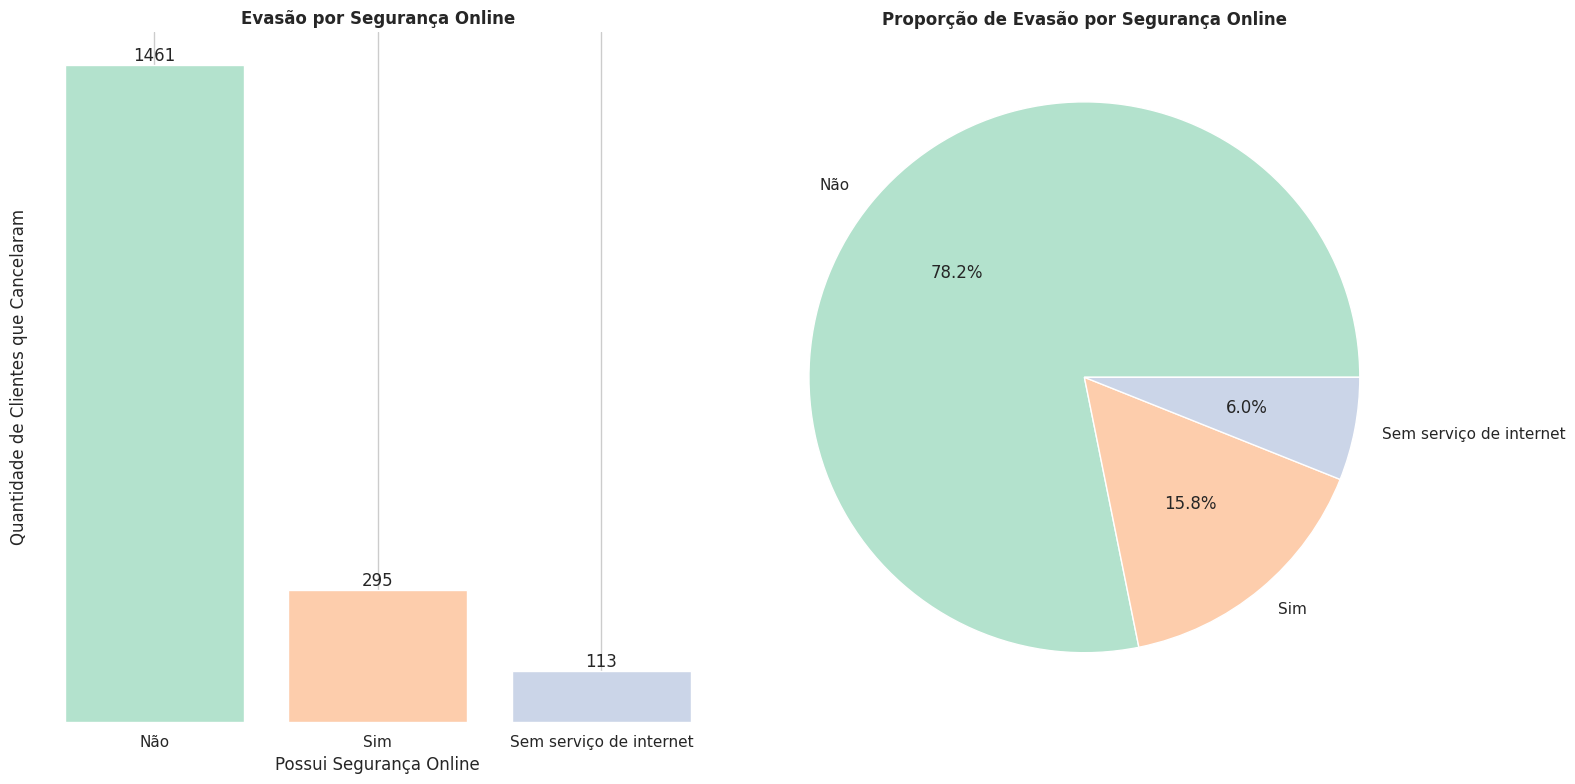

In [ ]:
df_onlinesecurity = df_churn['Segurança Online'].replace({0: 'Não', 1: 'Sim'})

online_security_churn_counts = df_onlinesecurity.value_counts()

cores = plt.cm.Pastel2(range(len(online_security_churn_counts)))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

ax1.bar(online_security_churn_counts.index, online_security_churn_counts.values, color=cores)
ax1.set_title('Evasão por Segurança Online', fontweight='bold')
ax1.set_xlabel('Possui Segurança Online')
ax1.set_ylabel('Quantidade de Clientes que Cancelaram')
ax1.set_yticks([])

plt.setp(ax1.spines.values(), visible=False)

for container in ax1.containers:
      ax1.bar_label(container, fmt='%d')

ax2.pie(online_security_churn_counts.values, labels=online_security_churn_counts.index, autopct='%1.1f%%', colors=cores)
ax2.set_title('Proporção de Evasão por Segurança Online', fontweight='bold')

plt.tight_layout()
plt.show()

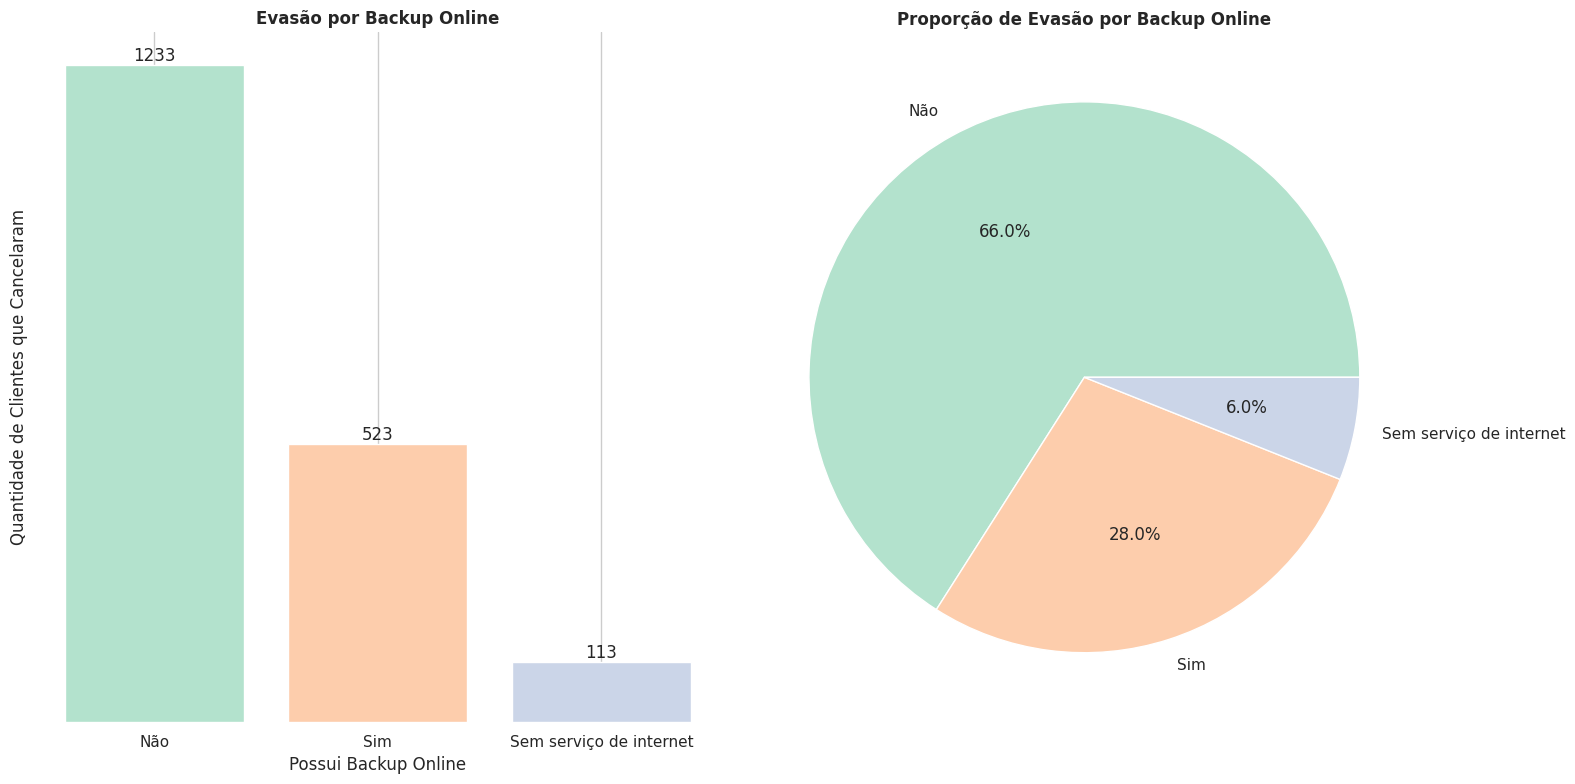

In [ ]:
df_online_backup = df_churn['Backup Online'].replace({0: 'Não', 1: 'Sim'})

online_backup_churn_counts = df_online_backup.value_counts()

cores = plt.cm.Pastel2(range(len(online_backup_churn_counts)))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

ax1.bar(online_backup_churn_counts.index, online_backup_churn_counts.values, color=cores)
ax1.set_title('Evasão por Backup Online', fontweight='bold')
ax1.set_xlabel('Possui Backup Online')
ax1.set_ylabel('Quantidade de Clientes que Cancelaram')
ax1.set_yticks([])

plt.setp(ax1.spines.values(), visible=False)

for container in ax1.containers:
      ax1.bar_label(container, fmt='%d')

ax2.pie(online_backup_churn_counts.values, labels=online_backup_churn_counts.index, autopct='%1.1f%%', colors=cores)
ax2.set_title('Proporção de Evasão por Backup Online', fontweight='bold')

plt.tight_layout()
plt.show()

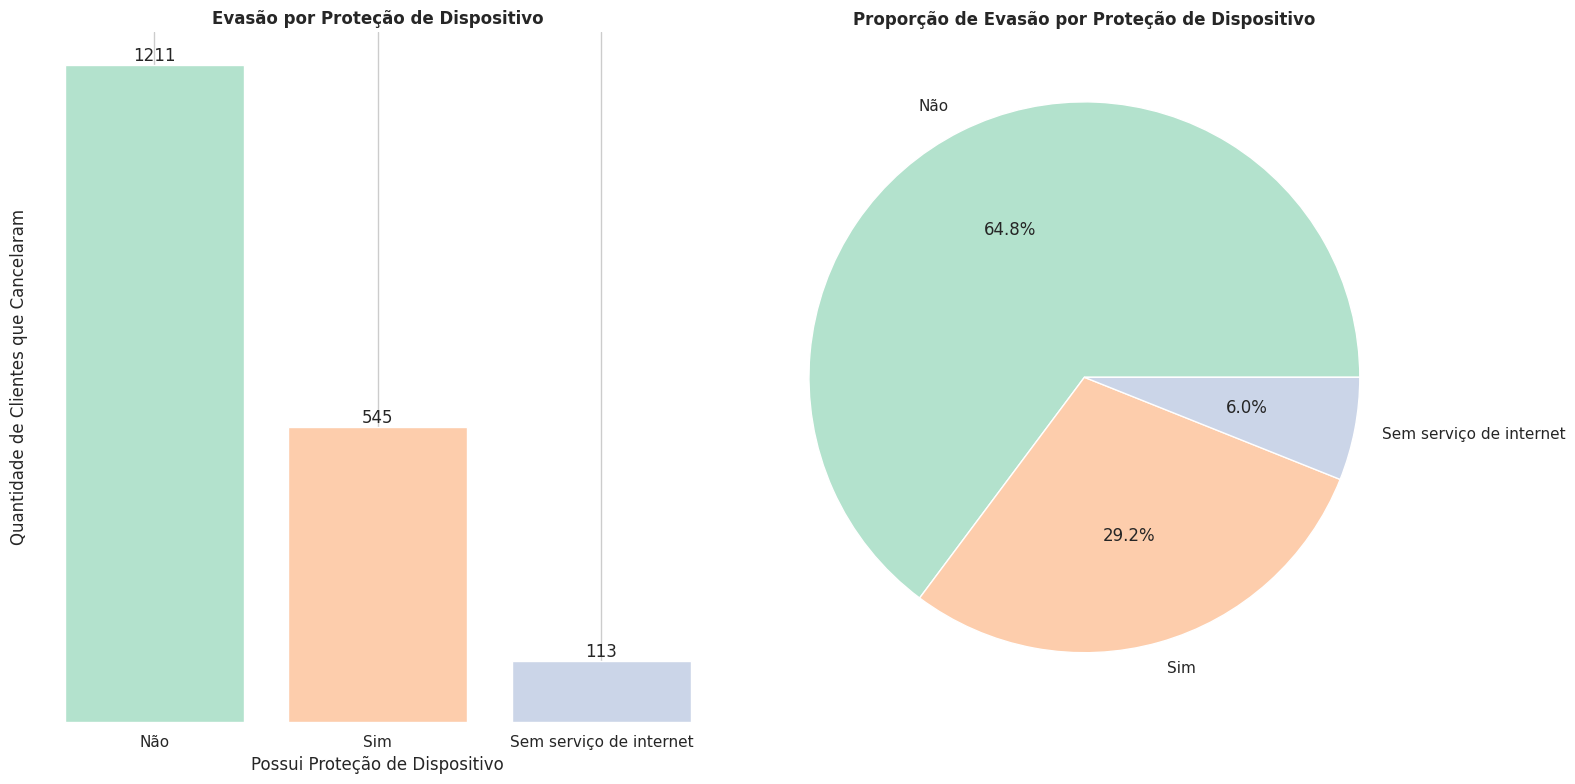

In [ ]:
df_device_protection = df_churn['Proteção de Dispositivo'].replace({0: 'Não', 1: 'Sim'})

device_protection_churn_counts = df_device_protection.value_counts()

cores = plt.cm.Pastel2(range(len(device_protection_churn_counts)))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

ax1.bar(device_protection_churn_counts.index, device_protection_churn_counts.values, color=cores)
ax1.set_title('Evasão por Proteção de Dispositivo', fontweight='bold')
ax1.set_xlabel('Possui Proteção de Dispositivo')
ax1.set_ylabel('Quantidade de Clientes que Cancelaram')
ax1.set_yticks([])

plt.setp(ax1.spines.values(), visible=False)

for container in ax1.containers:
      ax1.bar_label(container, fmt='%d')

ax2.pie(device_protection_churn_counts.values, labels=device_protection_churn_counts.index, autopct='%1.1f%%', colors=cores)
ax2.set_title('Proporção de Evasão por Proteção de Dispositivo', fontweight='bold')

plt.tight_layout()
plt.show()

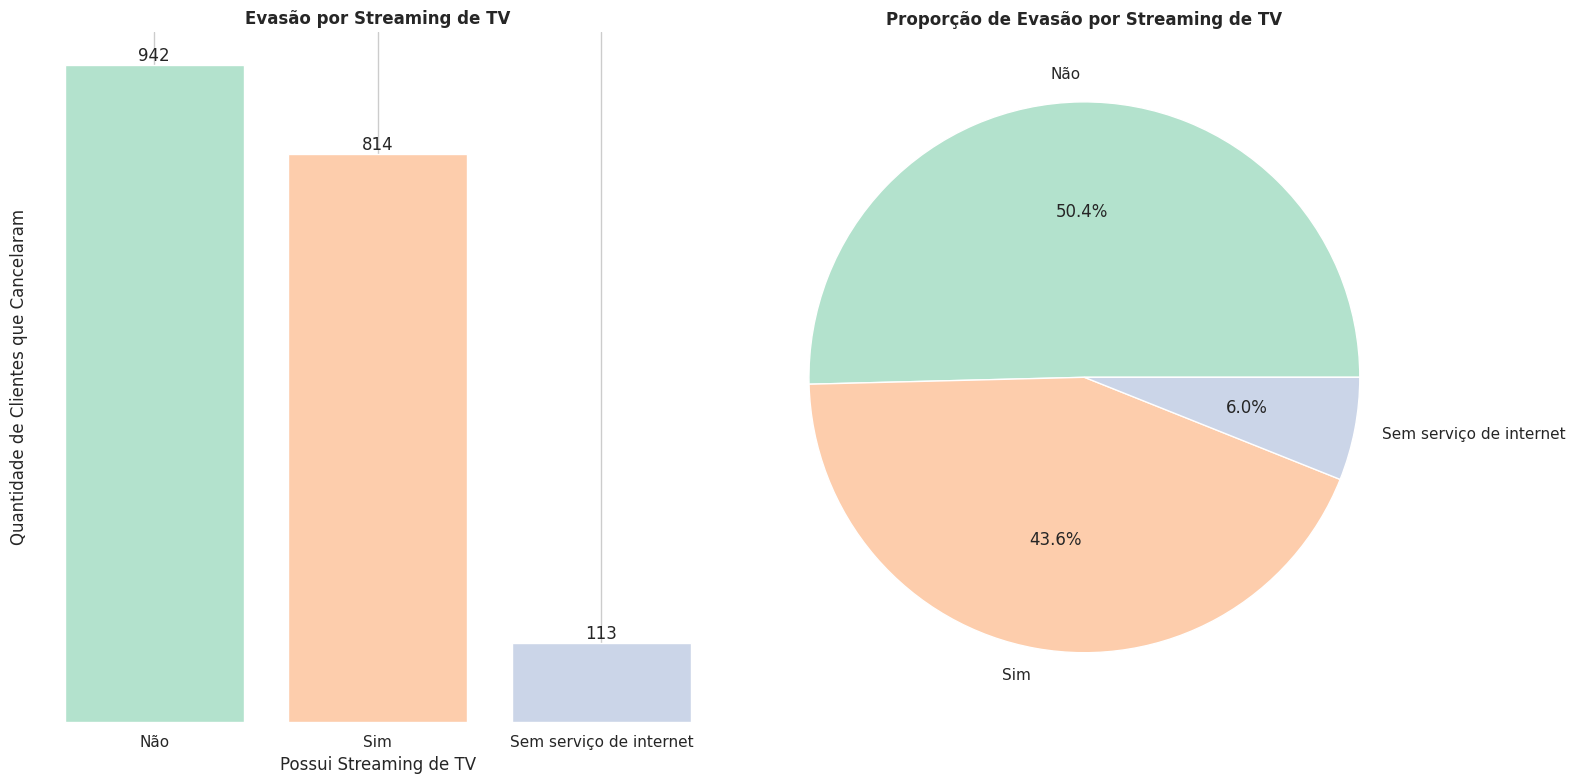

In [ ]:
df_streaming_tv = df_churn['Streaming de TV'].replace({0: 'Não', 1: 'Sim'})

streaming_tv_churn_counts = df_streaming_tv.value_counts()

color = plt.cm.Pastel2(range(len(streaming_tv_churn_counts)))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

ax1.bar(streaming_tv_churn_counts.index, streaming_tv_churn_counts.values, color=color)
ax1.set_title('Evasão por Streaming de TV', fontweight='bold')
ax1.set_xlabel('Possui Streaming de TV')
ax1.set_ylabel('Quantidade de Clientes que Cancelaram')
ax1.set_yticks([])

plt.setp(ax1.spines.values(), visible=False)

for container in ax1.containers:
      ax1.bar_label(container, fmt='%d')

ax2.pie(streaming_tv_churn_counts.values, labels=streaming_tv_churn_counts.index, autopct='%1.1f%%', colors=color)
ax2.set_title('Proporção de Evasão por Streaming de TV', fontweight='bold')

plt.tight_layout()
plt.show()

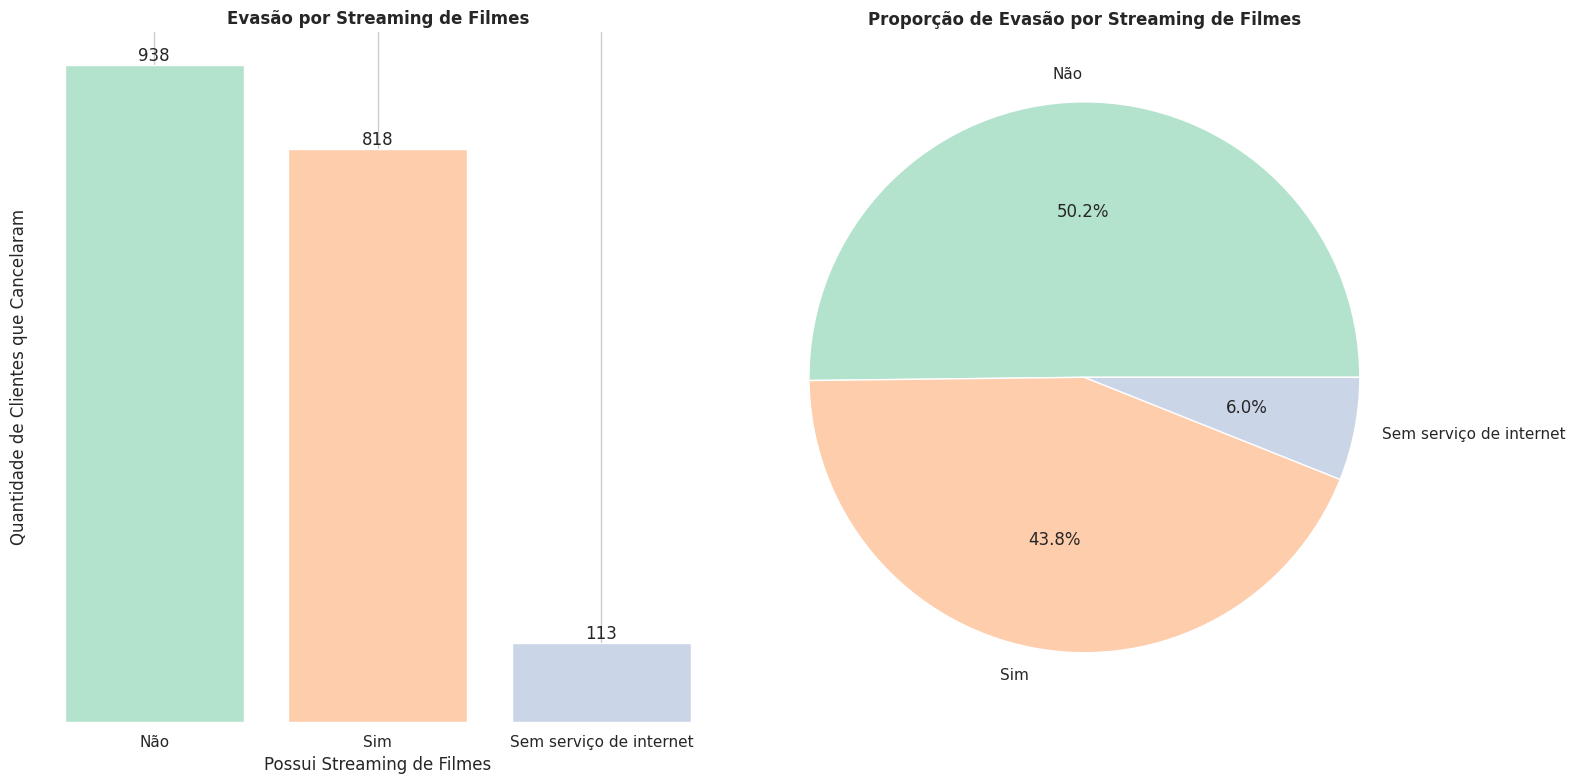

In [ ]:
df_streaming_movies = df_churn['Streaming de Filmes'].replace({0: 'Não', 1: 'Sim'})

streaming_movies_churn_counts = df_streaming_movies.value_counts()

color = plt.cm.Pastel2(range(len(streaming_movies_churn_counts)))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

ax1.bar(streaming_movies_churn_counts.index, streaming_movies_churn_counts.values, color=color)
ax1.set_title('Evasão por Streaming de Filmes', fontweight='bold')
ax1.set_xlabel('Possui Streaming de Filmes')
ax1.set_ylabel('Quantidade de Clientes que Cancelaram')
ax1.set_yticks([])

plt.setp(ax1.spines.values(), visible=False)

for container in ax1.containers:
      ax1.bar_label(container, fmt='%d')

ax2.pie(streaming_movies_churn_counts.values, labels=streaming_movies_churn_counts.index, autopct='%1.1f%%', colors=color)
ax2.set_title('Proporção de Evasão por Streaming de Filmes', fontweight='bold')

plt.tight_layout()
plt.show()

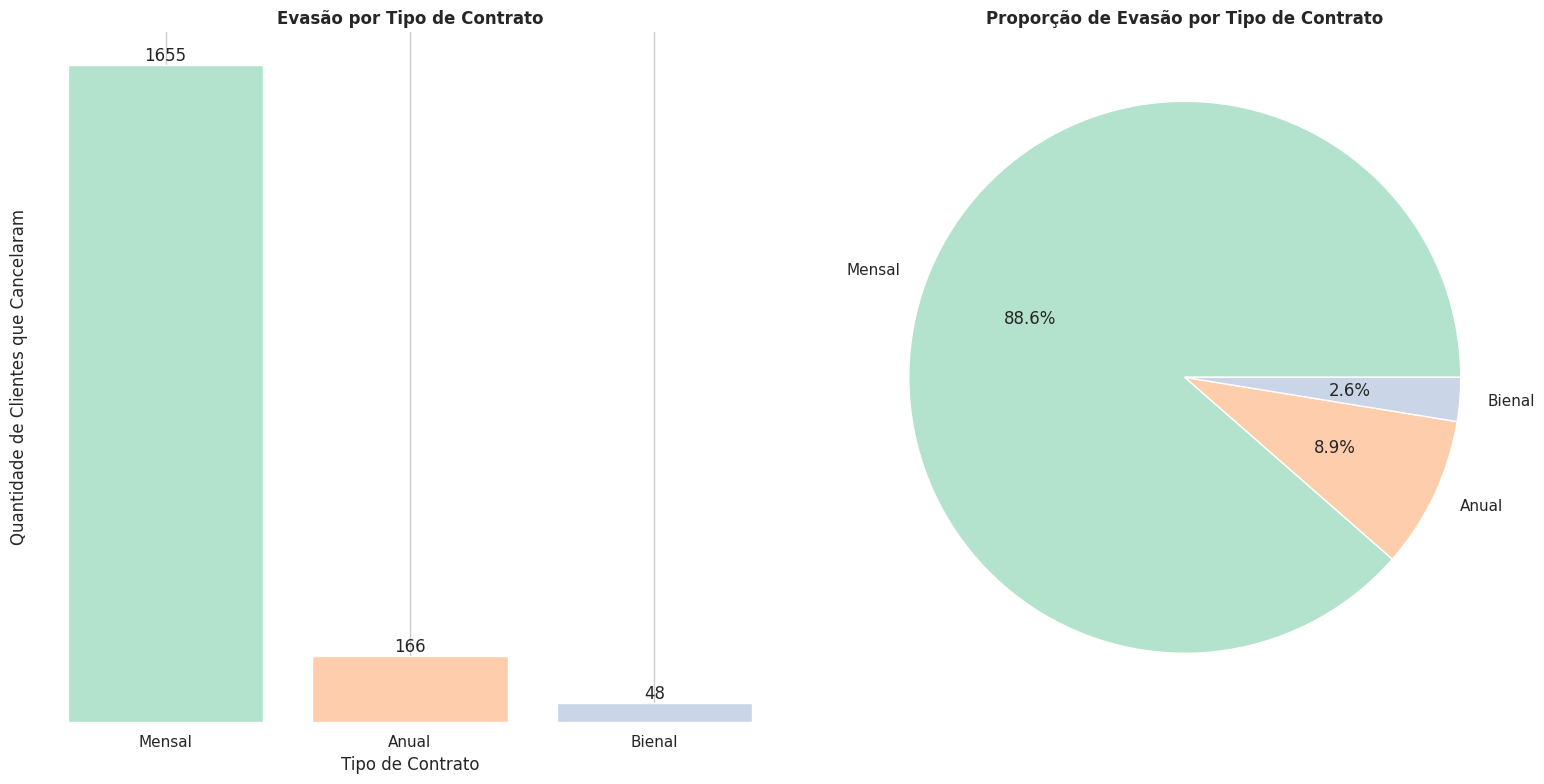

In [ ]:
df_account_contract = df_churn['Tipo de Contrato']

account_contract_churn_counts = df_account_contract.value_counts()

color = plt.cm.Pastel2(range(len(account_contract_churn_counts)))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

ax1.bar(account_contract_churn_counts.index, account_contract_churn_counts.values, color=color)
ax1.set_title('Evasão por Tipo de Contrato', fontweight='bold')
ax1.set_xlabel('Tipo de Contrato')
ax1.set_ylabel('Quantidade de Clientes que Cancelaram')
ax1.set_yticks([])

plt.setp(ax1.spines.values(), visible=False)

for container in ax1.containers:
      ax1.bar_label(container, fmt='%d')

ax2.pie(account_contract_churn_counts.values, labels=account_contract_churn_counts.index, autopct='%1.1f%%', colors=color)
ax2.set_title('Proporção de Evasão por Tipo de Contrato', fontweight='bold')

plt.tight_layout()
plt.show()

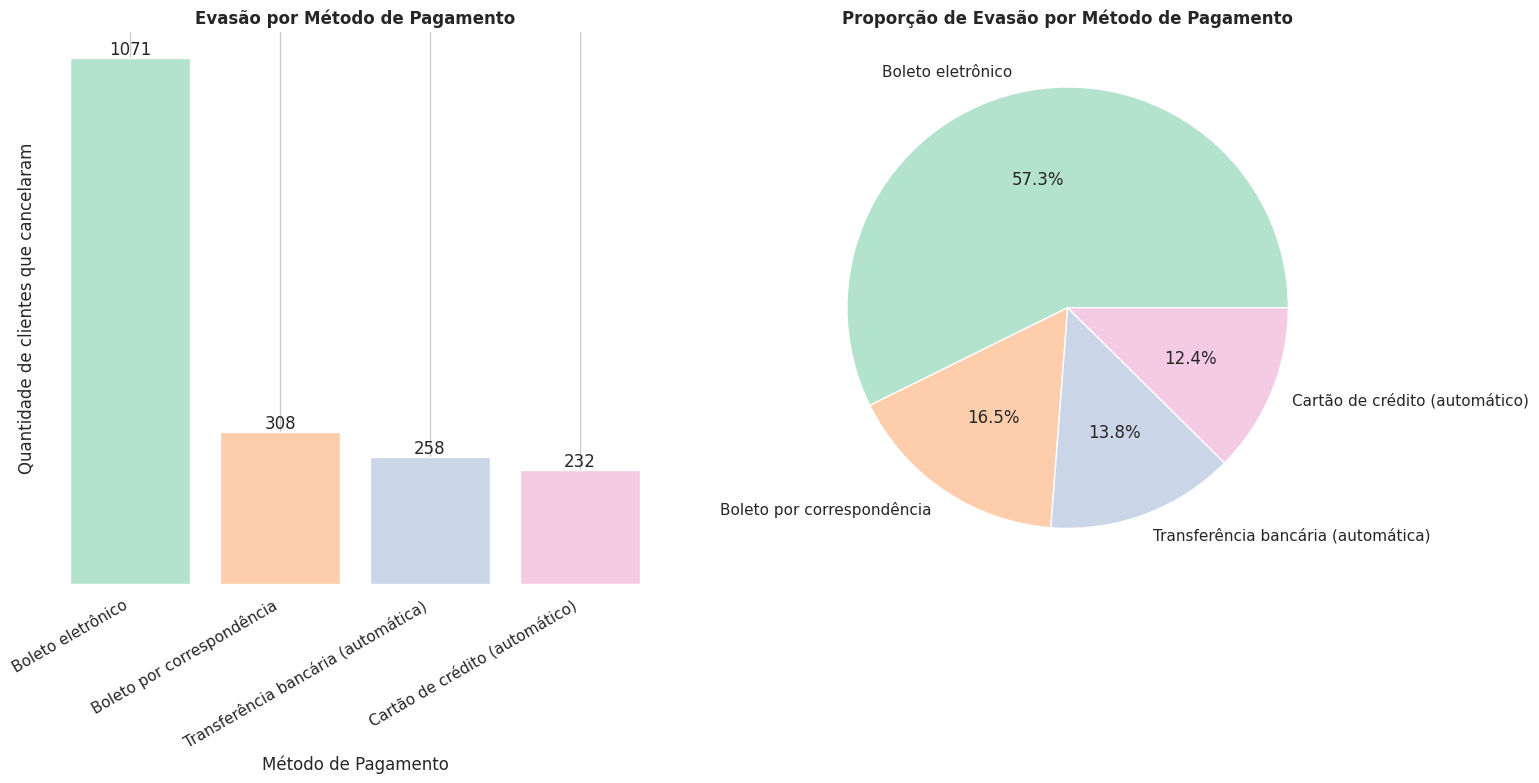

In [ ]:
df_account_payment = df_churn['Método de Pagamento']
account_payment_churn_counts = df_account_payment.value_counts()

color = plt.cm.Pastel2(range(len(account_payment_churn_counts)))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

ax1.bar(range(len(account_payment_churn_counts)), account_payment_churn_counts.values, color=color)
ax1.set_title('Evasão por Método de Pagamento', fontweight='bold')
ax1.set_xlabel('Método de Pagamento')
ax1.set_ylabel('Quantidade de clientes que cancelaram')
ax1.set_yticks([])

ax1.set_xticks(range(len(account_payment_churn_counts)))
ax1.set_xticklabels(account_payment_churn_counts.index, rotation=30, ha='right')

plt.setp(ax1.spines.values(), visible=False)

for container in ax1.containers:
    ax1.bar_label(container, fmt='%d')

ax2.pie(account_payment_churn_counts.values, labels=account_payment_churn_counts.index, autopct='%1.1f%%', colors=color)
ax2.set_title('Proporção de Evasão por Método de Pagamento', fontweight='bold')

plt.tight_layout()
plt.show()

## Variáveis numéricas

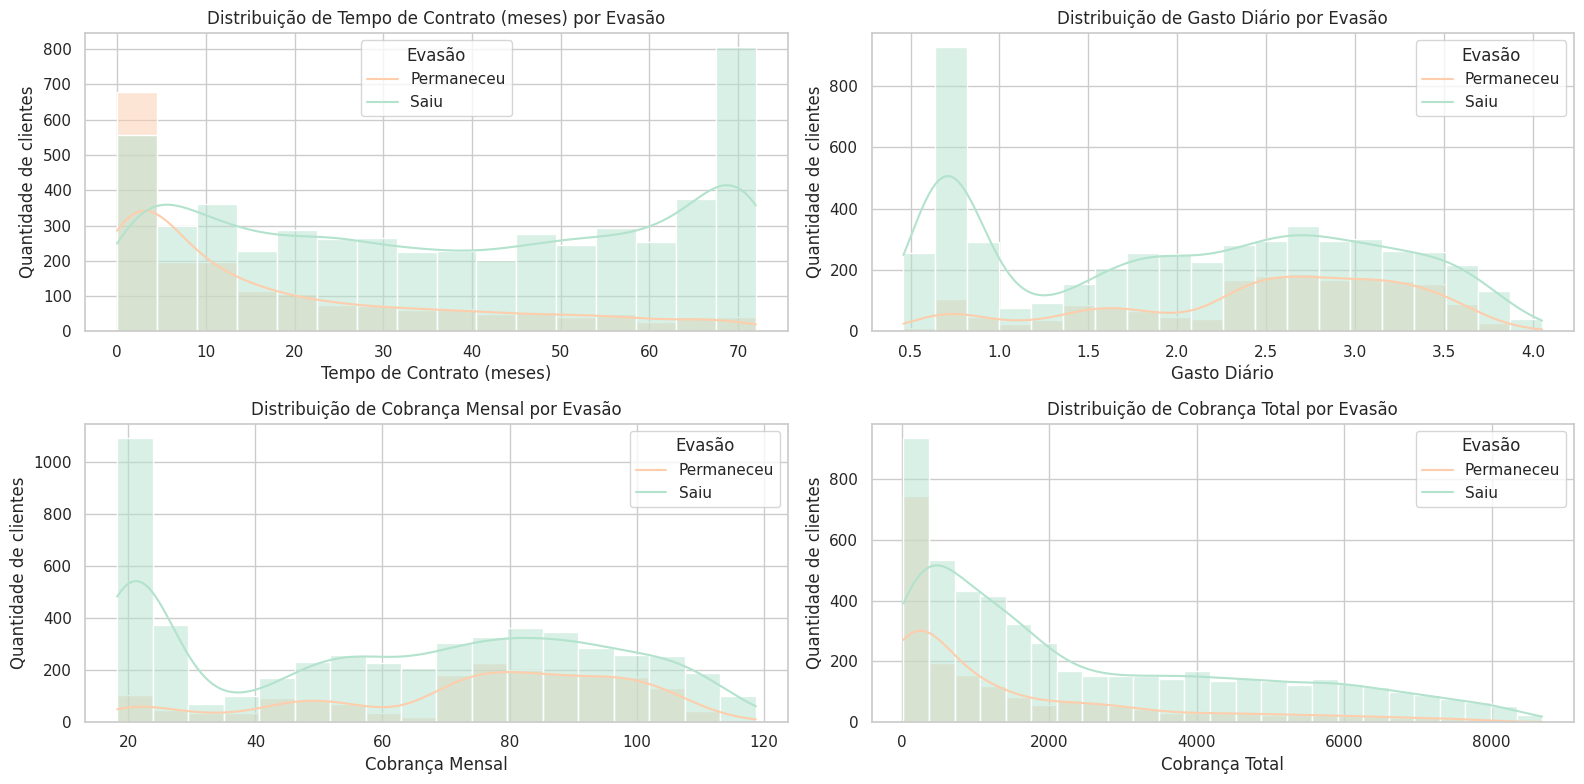

In [ ]:
from matplotlib.cm import bone
from matplotlib.cm import Pastel2

fig, axes = plt.subplots(2, 2, figsize=(16, 8))

cols = ['Tempo de Contrato (meses)', 'Gasto Diário', 'Cobrança Mensal', 'Cobrança Total']
df_numerico = df_final[cols]

titulos = {
    'Tempo de Contrato (meses)': 'Tempo de Contrato (meses)',
    'Gasto Diário': 'Gasto Diário',
    'Cobrança Mensal': 'Cobrança Mensal',
    'Cobrança Total': 'Cobrança Total'
}

for i, col in enumerate(cols):
    row = i // 2
    col_idx = i % 2
    sns.histplot(data=df_final, x=col, hue='Cancelamento', kde=True, palette='Pastel2', ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Distribuição de {titulos[col]} por Evasão', fontsize=12)
    axes[row, col_idx].set_xlabel(titulos[col])
    axes[row, col_idx].set_ylabel('Quantidade de clientes')
    axes[row, col_idx].legend(title='Evasão', labels=['Permaneceu', 'Saiu'])


plt.tight_layout()
plt.show()

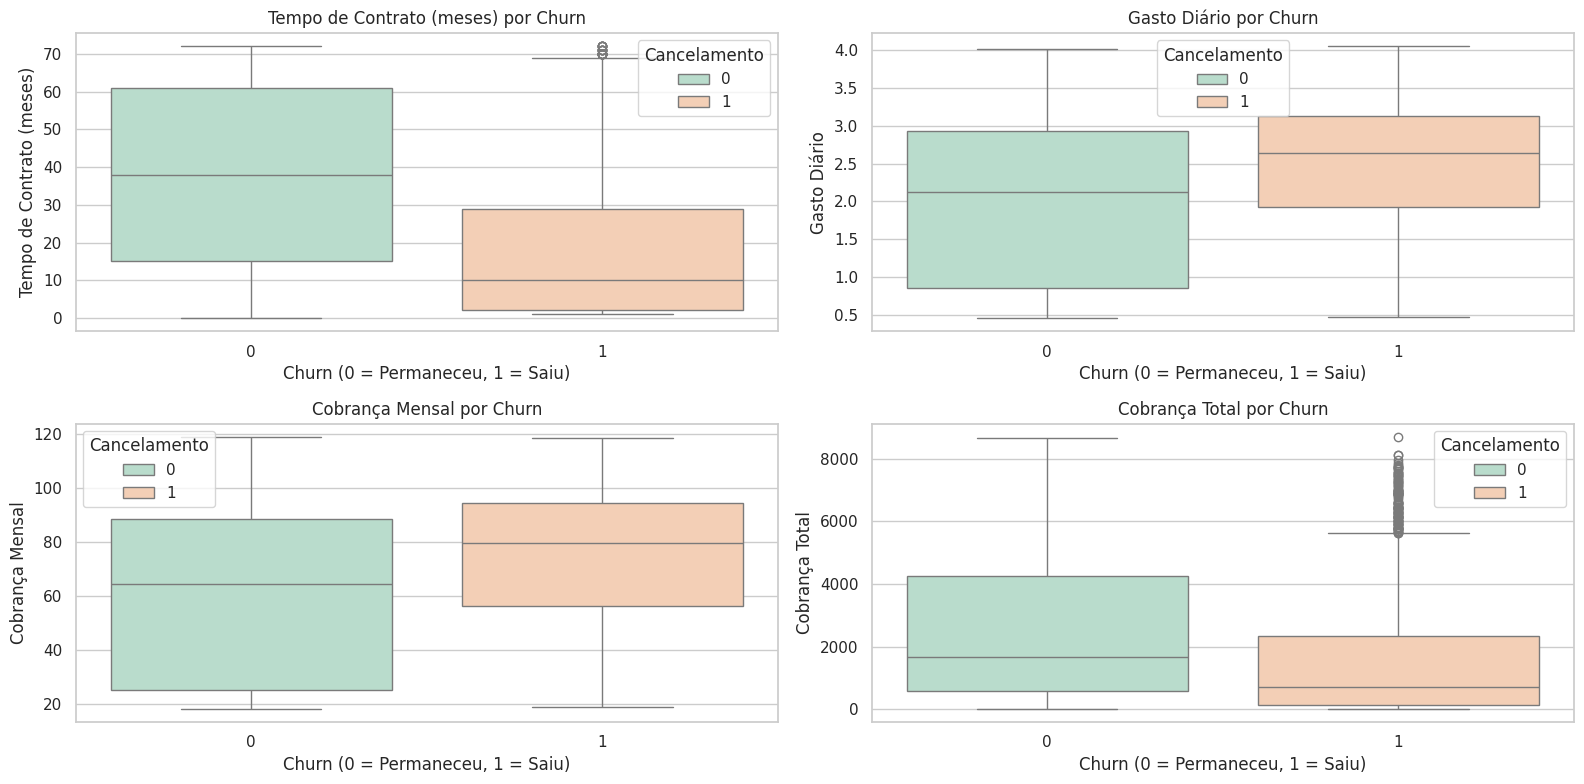

In [ ]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(16, 8))
axes = axes.flatten()

cols = ['Tempo de Contrato (meses)', 'Gasto Diário', 'Cobrança Mensal', 'Cobrança Total']
titulos = {
    'Tempo de Contrato (meses)': 'Tempo de Contrato (meses)',
    'Gasto Diário': 'Gasto Diário',
    'Cobrança Mensal': 'Cobrança Mensal',
    'Cobrança Total': 'Cobrança Total'
}

# Geração dos boxplots
for i, col in enumerate(cols):
    sns.boxplot(
        data=df_final,
        x='Cancelamento',
        y=col,
        hue='Cancelamento',
        palette='Pastel2',
        ax=axes[i]
    )
    axes[i].set_title(f'{titulos[col]} por Churn', fontsize=12)
    axes[i].set_xlabel('Churn (0 = Permaneceu, 1 = Saiu)')
    axes[i].set_ylabel(titulos[col])

plt.tight_layout()
plt.show()

## Correlação

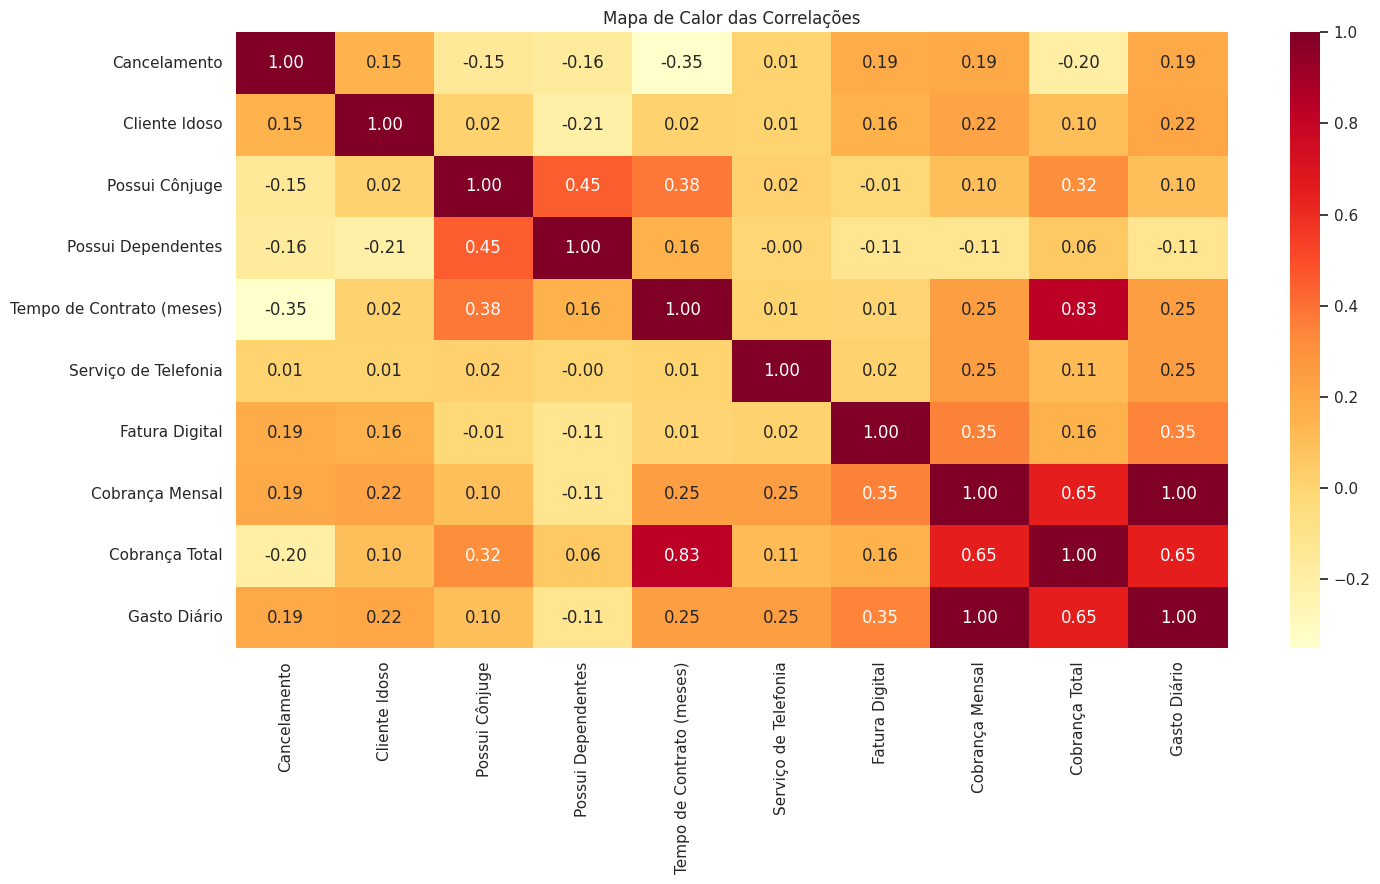

In [ ]:
correlacao = df_final.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(correlacao, annot=True, cmap='YlOrRd', fmt=".2f")
plt.title('Mapa de Calor das Correlações')
plt.show()

# 📝 Relatório Final Telecom X

<h3>🧾<strong>Introdução</strong></h3>

Esse projeto faz um estudo sobre a base de clientes da Telecom X com o objetivo de descobrir o que levam os clientes a deixarem a empresa. Por meio desta análise poderá entender os principais fatores que causa a evasão (Churn) que, caso continue, será bem prejudicial para a saúde da empresa.

A partir dessa pesquisa, será possivel descobrir os principais perfis de clientes que encerraram seu contrato e montar novos planos para aumentar a retenção.

<h3>🧹<strong>Limpeza e Tratamento de Dados</strong></h3>

Passos feitos antes de realizar as análises do dados:

* <strong>Importação do dados JSON</strong> por meio de API.
* <strong>Normalização das colunas aninhadas para tabela</strong> - Facilitando a manipulação para uma análise precisa.
* <strong>Identificação e remoção de dados ausentes e inconsistentes</strong> - Linhas com informações ausentes foram removidas para não comprometer a análise.
* <strong>Conversão dos formatos de colunas e variáveis categóricas</strong> - Palavras "Sim" e "Não", foram transformadas em formato binário (1 e 0) para facilitar análise e colunas convertidas para o formatos apropriados
* <strong>Criação da coluna `Total.Daily</strong> - para compreender o gasto diário do clientes.
* <strong>Tradução e pradonização do dados</strong> - As colunas e os dados foram traduzidos para o português para facilitar a interpretação dos resultados e a comunicação dos insights.

<h3><strong>📈Análise Exploratória de Dados</strong></h3>

Com os dados limpos e preparados, foi realizada uma análise exploratória para identificar padrões e tendências. As principais visualizações e análises incluem:

<strong>Distribuição do Churn:</strong> A análise inicial mostrou a proporção de clientes que evadiram em comparação com os que permaneceram na base. Isso nos deu uma visão geral do tamanho do problema.

<strong>Análise por Perfil:</strong> Foram criados gráficos para comparar a taxa de churn por gênero, faixa etária (idosos ou não) e existência de dependentes. Essas análises ajudam a identificar se determinados grupos demográficos são mais propensos a cancelar o serviço.

<strong>Gráfico usados:</strong> Gráfico de barras verticais para comparação entre valores brutos, gráfico de setores para visualização de proporção, histograma para comparar relação de evasão com outras categorias de dados.

<h3><strong>💡Conclusões e Insights</strong></h3>

A análise dos dados permitiu extrair as seguintes conclusões:

<strong>Impacto dos encargos mensais:</strong> A análise de correlação sugere que clientes com contas mensais mais altas têm uma maior propensão a cancelar o serviço. Isso pode indicar que o preço é um fator sensível para a base de clientes.

<strong>Vulnerabilidade de novos clientes:</strong> Clientes com menor tempo de contrato (e, consequentemente, menor gasto total acumulado) parecem ter uma taxa de churn mais elevada, sugerindo que o período inicial de serviço é crítico para a retenção.

<h3><strong>✅Recomendações</strong></h3>

Com base nos insights gerados, recomendamos as seguintes ações estratégicas para a Telecom X:

* <strong>1. Revisão da estratégia de preços e planos:</strong> Considerar a criação de planos com melhor custo-benefício ou oferecer descontos progressivos para clientes fiéis, visando mitigar o impacto de contas mensais elevadas.

* <strong>2. Programa para novos clientes:</strong> Desenvolver um programa de boas-vindas e acompanhamento nos primeiros meses de contrato para garantir que os novos clientes percebam o valor do serviço e se sintam satisfeitos, aumentando a probabilidade de retenção a longo prazo.

* <strong>3. Ações de retenção focadas:</strong> Utilizar os dados para identificar proativamente os clientes com alto risco de evasão (ex: aqueles com perfil de risco e contas elevadas) e oferecer benefícios ou descontos personalizados para incentivá-los a permanecer.

* <strong>4. Pesquisas de satisfação:</strong> Implementar pesquisas de satisfação para clientes que cancelaram o serviço, a fim de coletar feedback direto e entender com mais profundidade os motivos da evasão, permitindo ajustes mais precisos nas estratégias de retenção.